In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
exps = 15
def get_marg_box_multiple():
    num_classes = 4
    var_ansatz_list = ["QCNN_not_shared"]
    num_layers_list = [1, 5, 9]
    r_list = [0.0, 0.5, 1.0]
    def marg_and_g(r, var_ansatz, num_layers):
        marg_dist, g_gap, test_accuracy_list = np.array([]), np.array([]), np.array([])
        for exp in range(1,exps + 1):
            PATH = f"../..//results_500conv/{num_classes}C/{r}R/8Q/{var_ansatz}/{num_layers}L_5000MS_Full BatchBS_0.001LR_500conv/20S/{exp}E/"
            marg_dist = np.append(marg_dist, np.load(PATH + "margin_dist.npy"))
            f = open(PATH + "results.txt", "r")
            lines = f.readlines()
            test_accuracy = float(lines[1][15:-1])
            g = float(lines[2][20:-1])
            g_gap = np.append(g_gap, g)
            test_accuracy_list = np.append(test_accuracy_list, test_accuracy)
        return marg_dist, g_gap, test_accuracy_list
    
    fig, axes = plt.subplots(len(var_ansatz_list), 3, figsize=(15,5))
    plt.rcParams.update({'font.size': 12})
    g_array = np.zeros((len(var_ansatz_list), 3, len(num_layers_list), exps))
    te_array = np.zeros((len(var_ansatz_list), 3, len(num_layers_list), exps))
    marg_array = np.zeros((len(var_ansatz_list), 3, len(num_layers_list), 20 * exps))
    for (i,var_ansatz) in enumerate(var_ansatz_list):
        for (j,r) in enumerate(r_list):
            te_list = []
        
            for (k,num_layers) in enumerate(num_layers_list):
                marg, g, te = marg_and_g(r, var_ansatz, num_layers)
                marg_array[i,j,k,:] = marg
                g_array[i,j,k,:] = g
                te_array[i,j,k,:] = te
                te = np.mean(te_array[i,j,k,:])
                te_list.append(te)
            bp1 = axes[j].boxplot(marg_array[i,j,0], positions=[2], widths=0.5, patch_artist=True, boxprops=dict(facecolor="lightblue"), showfliers=False, medianprops=dict(color='black'), vert=False)
            bp2 = axes[j].boxplot(marg_array[i,j,1], positions=[1], widths=0.5, patch_artist=True, boxprops=dict(facecolor="lightgreen"), showfliers=False, medianprops=dict(color='black'), vert=False)
            bp3 = axes[j].boxplot(marg_array[i,j,2], positions=[0], widths=0.5, patch_artist=True, boxprops=dict(facecolor="lightyellow"), showfliers=False, medianprops=dict(color='black'), vert=False)
            axes[j].set_xlabel("Margin Distribution")
            axes[j].set_xlim(-0.1, 1.1)
            axes[j].set_yticks([0,1,2], ["9L", "5L", "1L"])
            axes[j].set_title(f"Corruption {r*100}%")
            #axes[j].legend(legend_labels, loc='upper right')
            axes[j].legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], [f'{te_list[0]:.3f}', f'{te_list[1]:.3f}', f'{te_list[2]:.3f}'], loc='upper right', title="Test Accuracy")
        axes[0].set_ylabel("Number of Layers")
    
    
    plt.savefig("marg_box.pdf")
    plt.show()
    

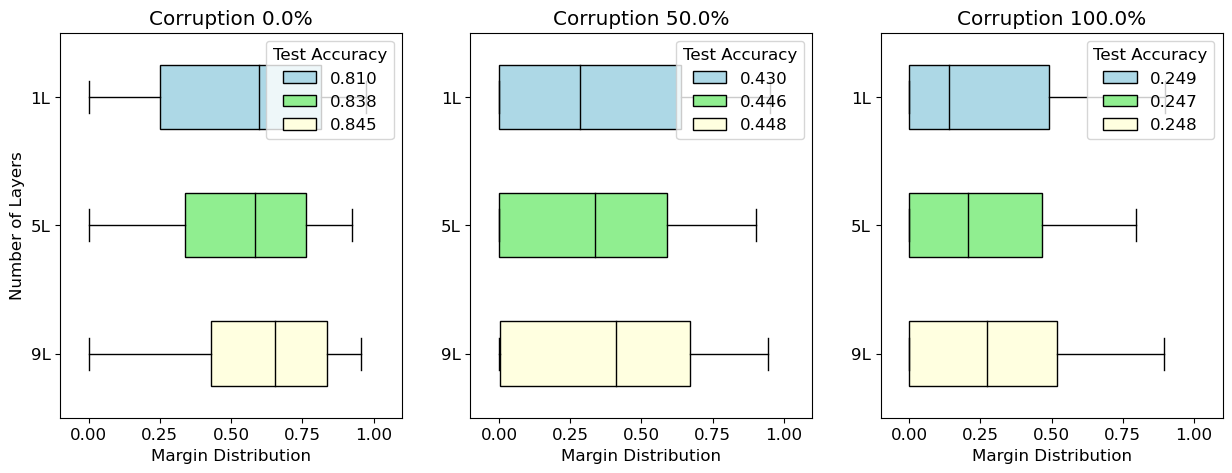

In [19]:
get_marg_box_multiple()
